# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Facial sensor dataset

In [ ]:
####################### raw data ################################
import torch
import torch.nn.functional as F
import os
import pandas as pd

# load file
f_list_Facial = ['Happiness', 'Surprise', 'Disgust', 'Anger', 'Sadness']

df1_f = pd.DataFrame() # x_trainset rawdata
df2_f = pd.DataFrame() # x_testset rawdata
df3_f = [] # y_trainset rawdata
df4_f = [] # y_testset rawdata

for i in f_list_Facial:
    path = '/content/gdrive/MyDrive/sensorData_a/' + i + '/'
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.endswith('xlsx')]

    for j in file_list_py:
#######################################ORIGINAL################################################
        if int(j[0:-5]) <= 14:
            d1_f = pd.read_excel(path + j, header=None, index_col=None)
            d1_f = pd.DataFrame(data=d1_f).transpose()
            df1_f = pd.concat([df1_f,d1_f])
            df3_f.append(f_list_Facial.index(i))
        elif 14 < int(j[0:-5]) <= 20:
            d2_f = pd.read_excel(path + j, header=None, index_col=None)
            d2_f = pd.DataFrame(data=d2_f).transpose()
            df2_f = pd.concat([df2_f,d2_f])
            df4_f.append(f_list_Facial.index(i))
        else:
            pass
#######################################JITTERING###############################################
        # if int(j[0:-5]) <= 14 or 20 < int(j[0:-5]) <= 132: #(1~14 && 21~132 Jittering)
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        # if 16 < int(j[0:-5]) <= 20:
        #     d2_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d2_f = pd.DataFrame(data=d2_f).transpose()
        #     df2_f = pd.concat([df2_f,d2_f])
        #     df4_f.append(f_list_Facial.index(i))
        # else:
        #     pass
#######################################SCALING###############################################
        # if int(j[0:-5]) <= 14 or 132 < int(j[0:-5]) <= 244: #(1~14 && 133~244 Scaling)
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        # elif 14 < int(j[0:-5]) <= 20:
        #     d2_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d2_f = pd.DataFrame(data=d2_f).transpose()
        #     df2_f = pd.concat([df2_f,d2_f])
        #     df4_f.append(f_list_Facial.index(i))
        # else:
        #     pass
#######################################TWARPING###############################################
        # if int(j[0:-5]) <= 14 or 244 < int(j[0:-5]) <= 356: #(1~14 && 245~356 Twarping)
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        # elif 14 < int(j[0:-5]) <= 20:
        #     d2_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d2_f = pd.DataFrame(data=d2_f).transpose()
        #     df2_f = pd.concat([df2_f,d2_f])
        #     df4_f.append(f_list_Facial.index(i))
        # else:
        #     pass
#######################################MWarping###############################################
        # if int(j[0:-5]) <= 14 or 356 < int(j[0:-5]) <= 468: #(1~14 && 357~468 Mwarping)
        #     d1_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d1_f = pd.DataFrame(data=d1_f).transpose()
        #     df1_f = pd.concat([df1_f,d1_f])
        #     df3_f.append(f_list_Facial.index(i))
        # elif 14 < int(j[0:-5]) <= 20:
        #     d2_f = pd.read_excel(path + j, header=None, index_col=None)
        #     d2_f = pd.DataFrame(data=d2_f).transpose()
        #     df2_f = pd.concat([df2_f,d2_f])
        #     df4_f.append(f_list_Facial.index(i))
        # else:
        #     pass

    df1_f = df1_f.reset_index(drop = True)
    df1_f = df1_f.iloc[:,0:64]
    df2_f = df2_f.reset_index(drop = True)
    df2_f = df2_f.iloc[:,0:64]

# convert to tensor

df1_np = pd.DataFrame.to_numpy(df1_f)
df2_np = pd.DataFrame.to_numpy(df2_f)
x_train_f = torch.FloatTensor(df1_np).to(device)
x_test_f = torch.FloatTensor(df2_np).to(device)
y_train_f = torch.LongTensor(df3_f).to(device)
y_test_f = torch.LongTensor(df4_f).to(device)

# expand dimension of the data

x_train_f = x_train_f.unsqueeze(0).to(device)
x_train_f = x_train_f.reshape(630,5,64).to(device)
x_test_f = x_test_f.unsqueeze(0).to(device)
x_test_f = x_test_f.reshape(20,5,64).to(device)

In [ ]:
import torch
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


# Custom_Dataset

class CustomDataset_train(Dataset):
    # preprocessing of the datasets
    def __init__(self):
        self.x_data = x_train_f
        self.y_data = y_train_f

    # length of the dataset, # of the dataset
    def __len__(self):
        return len(self.x_data)

    # get one data in the dataset
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

class CustomDataset_test(Dataset):
    # preprocessing of dataset
    def __init__(self): # x -> 내가 필요한것들
        self.x_data = x_test_f
        self.y_data = y_test_f

    # length of the dataset, # of the dataset
    def __len__(self):
        return len(self.x_data)

    # get one data in the dataset
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

train_dataset_f = CustomDataset_train()
test_dataset_f = CustomDataset_test()
train_dataloader_f = DataLoader(train_dataset_f, batch_size=1, shuffle=True)
test_dataloader_f = DataLoader(test_dataset_f, batch_size=1, shuffle=False)

# Define Band-Block Filter

In [ ]:
import scipy
from scipy import signal

def butter_bandstop_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='bandstop')
    y = signal.lfilter(b, a, data)
    return y

# Vocal raw data pre-processing

In [ ]:
import torch
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
from scipy.fft import fftshift
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
%matplotlib inline

# 파일 불러오기
f_list_Vocal = ['A', 'B', 'C', 'HELLO', 'ILOVEU']

for i in f_list_Vocal:
    path = '/content/gdrive/MyDrive/Vocal_Datasets/' + i + '/'
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.endswith('xlsx')]

    for j in file_list_py:
        if int(j[0:-5]) <= 14:
            d1 = pd.read_excel(path + j, header=None, index_col=None)
            d1 = pd.DataFrame(data=d1).transpose()
            d1 = d1.reset_index(drop = True)
            d1 = d1.iloc[:,0:35000]
            d1_np = pd.DataFrame.to_numpy(d1)
            d1_np = np.squeeze(d1_np, axis = 0)
            path_stft = '/content/gdrive/MyDrive/spectrogram_plt/trainset/'
        else:
            d1 = pd.read_excel(path + j, header=None, index_col=None)
            d1 = pd.DataFrame(data=d1).transpose()
            d1 = d1.reset_index(drop = True)
            d1 = d1.iloc[:,0:35000]
            d1_np = pd.DataFrame.to_numpy(d1)
            path_stft = '/content/gdrive/MyDrive/spectrogram_plt/testset/'

###########################################Band_Block_Filter##########################################################
        data = d1_np
        fs = 3.125e4
        lowcut = 59
        highcut = 61
        order = 2
        signal_filtered = butter_bandstop_filter(data, lowcut, highcut, fs, order)

###########################################Shor_Time_Fourier_Transformation###########################################
        x = signal_filtered
        fs = 3.125e4
        windowsize = 2**12
        window = np.hanning(windowsize)
        nfft = windowsize
        noverlap = 4e3

        f, t, Sxx = spectrogram(x, fs, window = window, noverlap = noverlap, nfft = nfft, scaling = 'density', mode = 'magnitude')
        Sxx = np.squeeze(Sxx)

        plt.figure(figsize = (6, 6))
        plt.ylim(0,1000)
        plt.pcolormesh(t, f, Sxx, cmap = 'jet', vmin = 0)
        plt.ylabel('Frequency [Hz]', fontsize = 15)
        plt.xlabel('Time [sec]', fontsize = 15)
        plt.axis('off')
        plt.savefig(path_stft + i + '/' + j[0:-5] + '.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        plt.close()

# Vocal sensor dataset

In [ ]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import torchvision
from torchvision import transforms

trans = transforms.Compose([transforms.Resize((100,100)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.ImageFolder(root='/content/gdrive/MyDrive/spectrogram_plt/trainset',
                                            transform=trans)
testset = torchvision.datasets.ImageFolder(root='/content/gdrive/MyDrive/spectrogram_plt/testset',
                                           transform=trans)
train_dataloader_v = DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)
test_dataloader_v = DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)

classes = trainset.classes

In [ ]:
def imshow(img):
    img = img / 2 + 0.5 #unnormalize
    np_img = img.numpy()
    #plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))

    print(np_img.shape)
    print((np.transpose(np_img, (1,2,0))).shape)

In [ ]:
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

torch.Size([1, 3, 100, 100])
(3, 100, 100)
(100, 100, 3)
torch.Size([1, 3, 100, 100])
torch.Size([3, 100, 100])
    A 


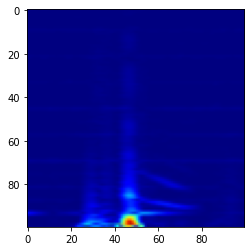

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print( (torchvision.utils.make_grid(images)).shape )
print(''.join('%5s ' %classes[labels[j]] for j in range(1)))

# Facial Sensor 1D CNN Network

In [ ]:
################### 1d cnn model #######################################
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("train with the following device", device)

# fix random seed (for reproducibility)
torch.manual_seed(777)

# fix randome seed if GPU is available
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

learning_rate = 0.001
training_epochs = 999

class CNN1d(nn.Module):

    def __init__(self):
        super(CNN1d, self).__init__()
        # 1st layer (CNN)
        self.layer1 = nn.Sequential(
            nn.Conv1d(5, 16, 1),
            nn.BatchNorm1d(16),
            nn.Tanh())

        # 2nd layer (CNN)
        self.layer2 = nn.Sequential(
            nn.Conv1d(16, 32, 1),
            nn.BatchNorm1d(32),
            nn.Tanh())

        # 3rd layer (CNN)
        self.layer3 = nn.Sequential(
            nn.Conv1d(32, 64, 1),
            nn.BatchNorm1d(64),
            nn.Tanh())

        # 4th layer (GAP)
        self.layer4 = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),
            nn.Tanh())

        # 5th layer (FC)
        self.layer5 = nn.Sequential(
            nn.Linear(64, 5, bias=True),
            nn.Tanh())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.shape[0], -1)
        out = self.layer5(out)
        return out

# define CNN model
model_facial = CNN1d().to(device)

다음 기기로 학습합니다: cpu


# Vocal Sensor 2D CNN Network

In [ ]:
################### 2d cnn model #######################################
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("train with the following device", device)

# fix random seed (for reproducibility)
torch.manual_seed(777)

# fix randome seed if GPU is available
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

learning_rate = 0.001
training_epochs = 199

class CNN2d(nn.Module):

    def __init__(self):
        super(CNN2d, self).__init__()
        # 1st layer (CNN)
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, 3),
            nn.BatchNorm2d(32),
            nn.Tanh(),
            nn.MaxPool2d(2))

        # 2nd layer (CNN)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.BatchNorm2d(64),
            nn.Tanh(),
            nn.MaxPool2d(2))

        # 3rd layer (CNN)
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, 3),
            nn.BatchNorm2d(128),
            nn.Tanh(),
            nn.MaxPool2d(2))

        # 4th layer (GAP)
        self.layer4 = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Tanh())

        # 5th layer (FC)
        self.layer5 = nn.Sequential(
            nn.Linear(128, 5, bias=True),
            nn.Softmax(dim=1))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.shape[0], -1)
        out = self.layer5(out)
        return out

# define CNN model
model_vocal = CNN2d().to(device)

다음 기기로 학습합니다: cpu


#Pre-Training

## Facial sensor_training

In [ ]:
#########facial sensor_training################

# define cost function and optimizer
criterion = nn.CrossEntropyLoss().to(device) # softmax is included in the cost function
optimizer = torch.optim.Adam(model_facial.parameters(), lr=learning_rate)

total_batch = len(train_dataloader_f)
print('total number of the batches : {}'.format(total_batch))

for epoch in range(training_epochs + 1):
    avg_cost = 0

    for X_train, Y_train in train_dataloader_f:
        X_train = X_train.to(device)
        Y_train = Y_train.to(device)

        optimizer.zero_grad()
        hypothesis = model(X_train)
        cost = criterion(hypothesis, Y_train)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

################################ Testing (trainset) #######################################
    correct_train = 0
    total_train = 0

    with torch.no_grad():
        for data in train_dataloader_f:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model_vocal(images)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    ################################ Testing (testset) #######################################
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in test_dataloader_f:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model_vocal(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        if correct_test / total_test > best_test_acc:
            best_epoch = epoch
            best_cost = avg_cost.item()
            best_train_acc = correct_train / total_train
            best_test_acc = correct_test / total_test
            best_model_wts = copy.deepcopy(model_vocal.state_dict())

    print('[Epoch: {:>4}] cost = {:.4f}'.format(epoch + 1, avg_cost),
          'trainset acc.: %{:.2f} %%' % (100 * correct_train / total_train),
          'testset acc.: %{:.2f} %%' % (100 * correct_test / total_test))

print('best condition : ', 'epoch: {:>4} cost = {:.4f}'.format(best_epoch + 1, best_cost),
      'trainset acc.: %{:.2f} %%' % (100 * best_test_acc),
      'trainset acc.: %{:.2f} %%' % (100 * best_test_acc))

############## store the model #################
PATH = F" " #수정
torch.save(best_model_wts, PATH)

## Vocal sensor_training

In [ ]:
#########vocal sensor_training################

# defien cost function and optimizer
criterion = nn.CrossEntropyLoss().to(device) # softmax is included in the cost function
optimizer = torch.optim.Adam(model_vocal.parameters(), lr=learning_rate)

total_batch = len(train_dataloader_v)
print('total number of the batches : {}'.format(total_batch))

best_model_wts = copy.deepcopy(model_vocal.state_dict())
best_epoch = 0
best_cost = 0.0
best_train_acc = 0.0
best_test_acc = 0.0

for epoch in range(training_epochs + 1):
    avg_cost = 0

    for X_train, Y_train in train_dataloader_v:
        X_train = X_train.to(device)
        Y_train = Y_train.to(device)

        optimizer.zero_grad()
        hypothesis = model_vocal(X_train)
        #print(hypothesis)
        cost = criterion(hypothesis, Y_train)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

    ################################ Testing (trainset) #######################################
    correct_train = 0
    total_train = 0

    with torch.no_grad():
        for data in train_dataloader_v:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model_vocal(images)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    ################################ Testing (testset) #######################################
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in test_dataloader_v:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model_vocal(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        if correct_test / total_test > best_test_acc:
            best_epoch = epoch
            best_cost = avg_cost.item()
            best_train_acc = correct_train / total_train
            best_test_acc = correct_test / total_test
            best_model_wts = copy.deepcopy(model_vocal.state_dict())

    print('[Epoch: {:>4}] cost = {:.4f}'.format(epoch + 1, avg_cost),
          'trainset acc.: %{:.2f} %%' % (100 * correct_train / total_train),
          'testset acc.: %{:.2f} %%' % (100 * correct_test / total_test))

print('best condition : ', 'epoch: {:>4} cost = {:.4f}'.format(best_epoch + 1, best_cost),
      'trainset acc.: %{:.2f} %%' % (100 * best_test_acc),
      'trainset acc.: %{:.2f} %%' % (100 * best_test_acc))

############## store the model #################
PATH = F"" #수정
torch.save(best_model_wts, PATH)